In [1]:
# Importing necessary ibraries as follows : 

# Data Loading
import pandas as pd
import numpy as np

# Data Preprocessing
from sklearn.preprocessing import StandardScaler

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Data Splitting and Model Building
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

# Model Libraries for cassification
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

# Model Libraries for ensemble techniques
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import RandomForestClassifier

# Metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Warning 
import warnings
warnings.filterwarnings('ignore')


In [2]:
# Importing the dataset

df = pd.read_csv(r'd:\Projects\fraud_detection\final_dataset.csv')
display(df.head().T)

,0,1,2,3,4
TX_AMOUNT,57.160000,81.510000,146.000000,64.490000,50.990000
TX_FRAUD,0.000000,0.000000,0.000000,0.000000,0.000000
TX_FRAUD_SCENARIO,0.000000,0.000000,0.000000,0.000000,0.000000
TransactionAmt_log,4.063198,4.412919,4.990433,4.181897,3.951051
High_TransactionAmt,0.000000,1.000000,1.000000,0.000000,0.000000


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1754155 entries, 0 to 1754154
Data columns (total 5 columns):
 #   Column               Dtype  
---  ------               -----  
 0   TX_AMOUNT            float64
 1   TX_FRAUD             int64  
 2   TX_FRAUD_SCENARIO    int64  
 3   TransactionAmt_log   float64
 4   High_TransactionAmt  int64  
dtypes: float64(2), int64(3)
memory usage: 66.9 MB


In [4]:
# splitting the dataset into dependent and independent variables

x = df.drop('TX_FRAUD', axis=1)
y = df['TX_FRAUD']

# standardizing the data
scaler = StandardScaler()
x = scaler.fit_transform(x)

# Splitting the dataset into training and testing set

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(1403324, 4) (350831, 4) (1403324,) (350831,)


In [6]:
# Convert numpy array back to DataFrame using original column names
pd.DataFrame(x, columns=df.drop('TX_FRAUD', axis=1).columns).head().T

,0,1,2,3,4
TX_AMOUNT,0.083345,0.658635,2.182267,0.256523,-0.062427
TX_FRAUD_SCENARIO,-0.089075,-0.089075,-0.089075,-0.089075,-0.089075
TransactionAmt_log,0.438311,0.818042,1.445111,0.567196,0.316541
High_TransactionAmt,-0.577284,1.732250,1.732250,-0.577284,-0.577284


In [7]:
# model building

models = { 'Logistic Regression': LogisticRegression(),
           'SVC': SVC(),
           'Decision Tree': DecisionTreeClassifier(),
           'Naive Bayes': GaussianNB(),
           'KNN': KNeighborsClassifier(),
           'AdaBoost': AdaBoostClassifier(),
           'Gradient Boosting': GradientBoostingClassifier(),
           'Bagging': BaggingClassifier(),
           'Random Forest': RandomForestClassifier()}

for name, model in models.items():
    model.fit(x_train, y_train)

In [8]:
for name, model in models.items():
    y_pred = model.predict(x_test)

In [9]:
pd.Series(y_pred).value_counts(), y_test.value_counts()

(0    347970
 1      2861
 Name: count, dtype: int64,
 TX_FRAUD
 0    347970
 1      2861
 Name: count, dtype: int64)

In [10]:
# cost function for the model

def cross_entropy_loss(y, y_pred_proba):
	return -np.mean(y * np.log(y_pred_proba[:, 1]) + (1 - y) * np.log(1 - y_pred_proba[:, 1]))

# Get predicted probabilities
y_pred_proba = model.predict_proba(x_test)

cross_entropy_loss(y_test, y_pred_proba)

np.float64(0.014016868270324768)

In [11]:
# Model Evaluation

for name, model in models.items():
    print(f'Accuracy score of {name} is {accuracy_score(y_test, y_pred)}')
    print(f'Confusion Matrix of {name} is {confusion_matrix(y_test, y_pred)}')
    print(f'Classification Report of {name} is {classification_report(y_test, y_pred)}')
    
    print('------------------------------------------------------')

Accuracy score of Logistic Regression is 1.0
Confusion Matrix of Logistic Regression is [[347970      0]
 [     0   2861]]
Classification Report of Logistic Regression is               precision    recall  f1-score   support

           0       1.00      1.00      1.00    347970
           1       1.00      1.00      1.00      2861

    accuracy                           1.00    350831
   macro avg       1.00      1.00      1.00    350831
weighted avg       1.00      1.00      1.00    350831

------------------------------------------------------
Accuracy score of SVC is 1.0
Confusion Matrix of SVC is [[347970      0]
 [     0   2861]]
Classification Report of SVC is               precision    recall  f1-score   support

           0       1.00      1.00      1.00    347970
           1       1.00      1.00      1.00      2861

    accuracy                           1.00    350831
   macro avg       1.00      1.00      1.00    350831
weighted avg       1.00      1.00      1.00    35083

In [12]:
# Voting Classifier

estimators = [('Logistic Regression', LogisticRegression()),
              ('SVC', SVC()),
              ('Decision Tree', DecisionTreeClassifier()),
              ('Naive Bayes', GaussianNB()),
              ('KNN', KNeighborsClassifier()),
              ('AdaBoost', AdaBoostClassifier()),
              ('Gradient Boosting', GradientBoostingClassifier()),
              ('Bagging', BaggingClassifier()),
              ('Random Forest', RandomForestClassifier())]

vc = VotingClassifier(estimators=estimators)
vc.fit(x_train, y_train)
y_pred = vc.predict(x_test)
print(f'Accuracy score of Voting Classifier is {accuracy_score(y_test, y_pred)}')
print(f'Confusion Matrix of Voting Classifier is {confusion_matrix(y_test, y_pred)}')
print(f'Classification Report of Voting Classifier is {classification_report(y_test, y_pred)}')


Accuracy score of Voting Classifier is 1.0
Confusion Matrix of Voting Classifier is [[347970      0]
 [     0   2861]]
Classification Report of Voting Classifier is               precision    recall  f1-score   support

           0       1.00      1.00      1.00    347970
           1       1.00      1.00      1.00      2861

    accuracy                           1.00    350831
   macro avg       1.00      1.00      1.00    350831
weighted avg       1.00      1.00      1.00    350831



In [13]:
# Validate with Cross-Validation: Use k-fold cross-validation to ensure the models generalize well to unseen data.

from sklearn.model_selection import cross_val_score

for name, model in models.items():
    scores = cross_val_score(model, x, y, cv=5, scoring='accuracy')
    print(f'{name} Accuracy: {scores.mean()}')
    print('------------------------------------------------------')


Logistic Regression Accuracy: 1.0
------------------------------------------------------
SVC Accuracy: 1.0
------------------------------------------------------
Decision Tree Accuracy: 1.0
------------------------------------------------------
Naive Bayes Accuracy: 1.0
------------------------------------------------------
KNN Accuracy: 1.0
------------------------------------------------------
AdaBoost Accuracy: 1.0
------------------------------------------------------
Gradient Boosting Accuracy: 1.0
------------------------------------------------------
Bagging Accuracy: 1.0
------------------------------------------------------
Random Forest Accuracy: 1.0
------------------------------------------------------


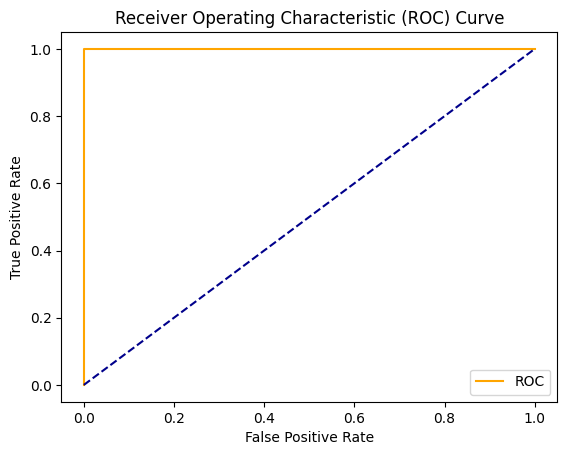

AUC: 1.0


In [16]:
# ROC Curve & AUC (Area Under the Curve)

from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Get predicted probabilities
y_pred_proba = model.predict_proba(x_test)

# Get ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba[:, 1])

# Plot ROC curve
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

# Get AUC score
auc = roc_auc_score(y_test, y_pred_proba[:, 1])
print(f'AUC: {auc}')



In [17]:
# Saving the Model For Scikit-learn:

import pickle

# Save model
with open("best_model.pkl", "wb") as f:
    pickle.dump(model, f)

# Load model
with open("best_model.pkl", "rb") as f:
    loaded_model = pickle.load(f)

# Make prediction
y_pred = loaded_model.predict(x_test)
print(pd.Series(y_pred).value_counts())


0    347970
1      2861
Name: count, dtype: int64
